# Logistic Regression to Predict Chip Quality

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Step 2: Load and Preview the Data
df = pd.read_csv("chip_test.csv")
df.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


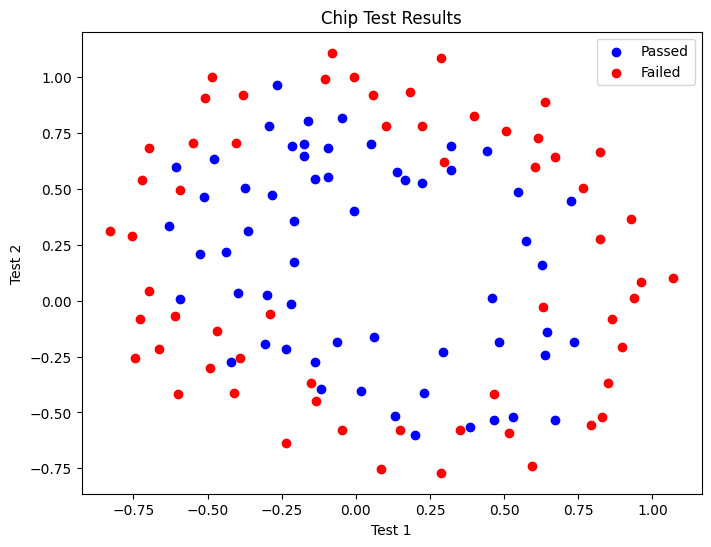

In [4]:
# Step 3: Visualize Data Distribution
plt.figure(figsize=(8,6))
passed = df[df['pass'] == 1]
failed = df[df['pass'] == 0]
plt.scatter(passed['test1'], passed['test2'], c='b', label='Passed')
plt.scatter(failed['test1'], failed['test2'], c='r', label='Failed')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("Chip Test Results")
plt.legend()
plt.show()

In [5]:
# Step 4: Polynomial Feature Expansion
X = df[['test1', 'test2']]
y = df['pass']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
print(X_poly[:5])

[[ 0.051267    0.69956     0.00262831  0.03586434  0.48938419]
 [-0.092742    0.68494     0.00860108 -0.06352271  0.4691428 ]
 [-0.21371     0.69225     0.04567196 -0.14794075  0.47921006]
 [-0.375       0.50219     0.140625   -0.18832125  0.2521948 ]
 [ 0.18376     0.93348     0.03376774  0.17153628  0.87138491]]


In [6]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)
print(X_scaled[:5])

[[-0.00710129  0.99791805 -0.98977681  0.27489801  0.66359293]
 [-0.29829632  0.9696688  -0.96564216 -0.1705373   0.59215143]
 [-0.54290103  0.98379343 -0.8158469  -0.54888415  0.62768358]
 [-0.8690393   0.61655322 -0.43216267 -0.72986247 -0.17356133]
 [ 0.26080767  1.449906   -0.86394925  0.88295584  2.01185525]]


In [7]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

LogisticRegression(max_iter=1000)

In [8]:
# Step 7: Evaluate Model
preds = model.predict(X_scaled)
accuracy = accuracy_score(y, preds)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.82


In [9]:
# Step 8: Visualize Decision Boundary
u = np.linspace(X['test1'].min(), X['test1'].max(), 200)
v = np.linspace(X['test2'].min(), X['test2'].max(), 200)
U, V = np.meshgrid(u, v)
UV = np.c_[U.ravel(), V.ravel()]
UV_poly = poly.transform(UV)
UV_scaled = scaler.transform(UV_poly)
Z = model.predict(UV_scaled).reshape(U.shape)

/opt/anaconda3/envs/study_ai/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


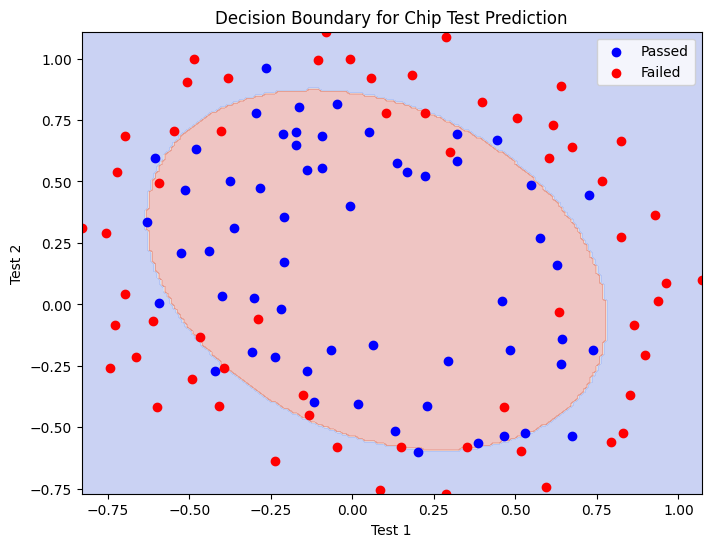

In [11]:
plt.figure(figsize=(8,6))
plt.contourf(U, V, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(passed['test1'], passed['test2'], c='b', label='Passed')
plt.scatter(failed['test1'], failed['test2'], c='r', label='Failed')
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.title("Decision Boundary for Chip Test Prediction")
plt.legend()
plt.show()

**Summary:**
This logistic regression model uses second-degree polynomial features
to separate chips that passed from those that failed based on two test results.
With high accuracy on training data, this model demonstrates how simple
yet powerful logistic regression can be in classification tasks.